In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('placement_dataset.csv')

In [5]:
df

,applicant_id,experience,skills_test_score,degree,hired
0,1,6,98,Bachelors,Yes
1,2,19,86,Bachelors,Yes
2,3,14,99,Bachelors,Yes
3,4,10,54,Bachelors,No
4,5,18,63,Bachelors,No
...,...,...,...,...,...
95,96,16,73,Masters,No
96,97,1,77,Bachelors,No
97,98,15,88,Bachelors,Yes
98,99,16,92,Masters,Yes


In [6]:
degree_encoder = LabelEncoder()
df['degree_encoded'] = degree_encoder.fit_transform(df['degree'])
hired_encoder = LabelEncoder()
df['hired_encoded'] = hired_encoder.fit_transform(df['hired'])
X = df[['experience', 'skills_test_score', 'degree_encoded']]
y = df['hired_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Data split into training ({X_train.shape[0]} records) and testing ({X_test.shape[0]} records).")

Data split into training (70 records) and testing (30 records).


In [7]:
clf_unpruned = DecisionTreeClassifier(random_state=42)
clf_unpruned.fit(X_train, y_train)
print("Unpruned decision tree trained successfully.")

Unpruned decision tree trained successfully.


In [8]:
path = clf_unpruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] 
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
test_scores = [clf.score(X_test, y_test) for clf in clfs]
best_alpha = ccp_alphas[np.argmax(test_scores)]
print(f"Best alpha found: {best_alpha:.5f}")
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_pruned.fit(X_train, y_train)
print("Pruned decision tree trained successfully.")

Best alpha found: 0.00916
Pruned decision tree trained successfully.


In [9]:
unpruned_accuracy = clf_unpruned.score(X_test, y_test)
pruned_accuracy = clf_pruned.score(X_test, y_test)
print(f"Unpruned Tree Accuracy: {unpruned_accuracy:.4f}")
print(f"Pruned Tree Accuracy:   {pruned_accuracy:.4f}")

Unpruned Tree Accuracy: 0.8000
Pruned Tree Accuracy:   0.8333


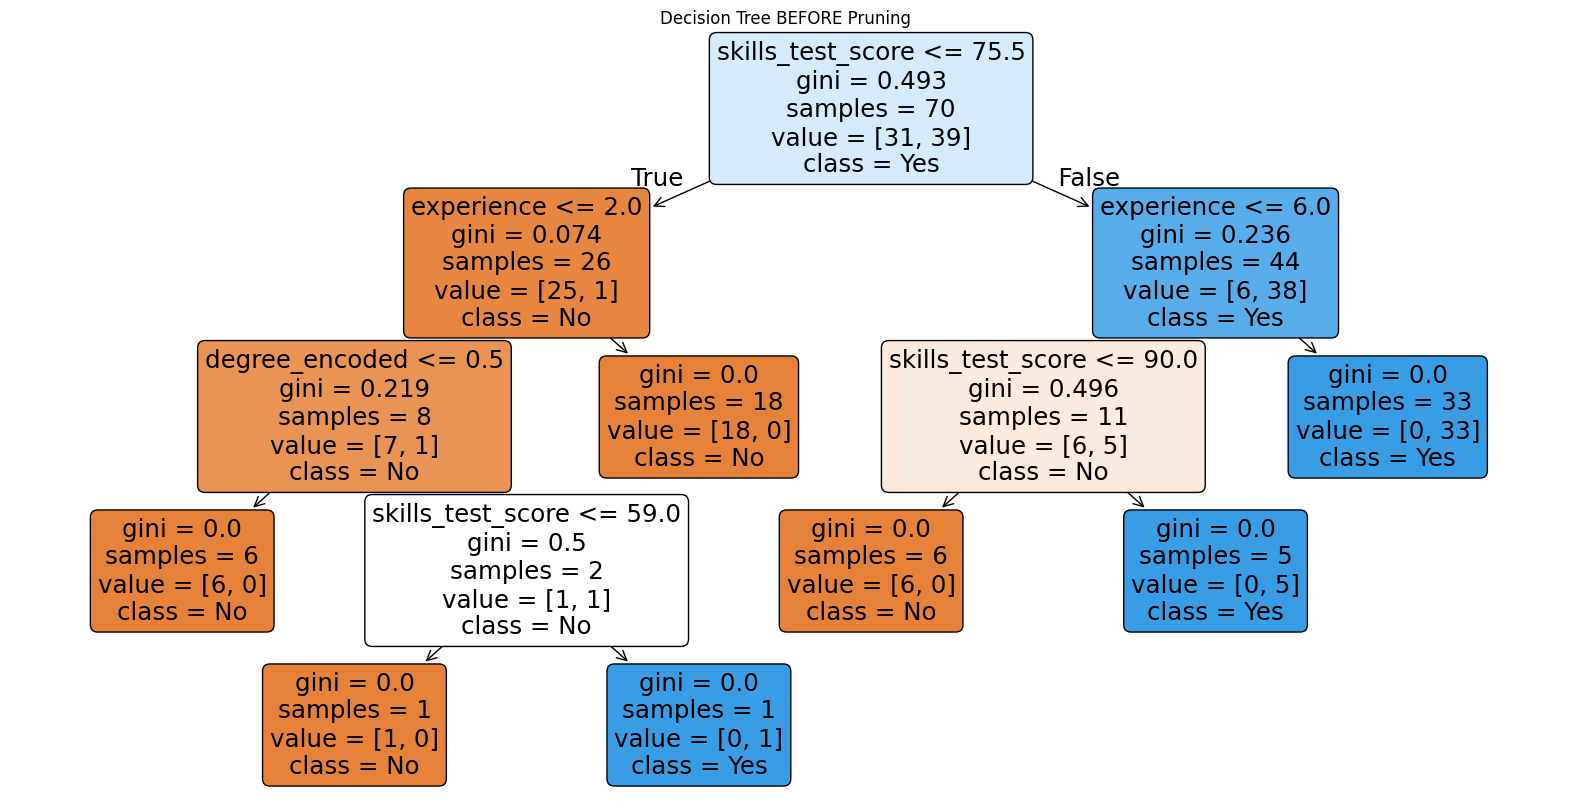

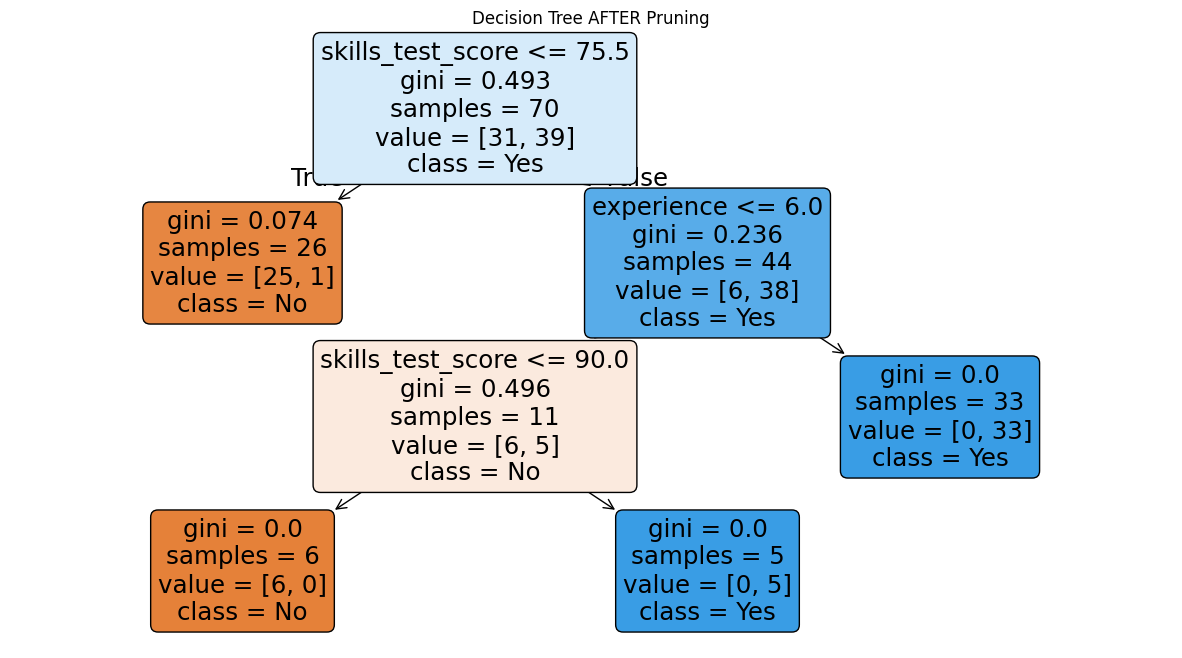

In [10]:
plt.figure(figsize=(20, 10))
plot_tree(clf_unpruned, 
          filled=True, 
          feature_names=X.columns.tolist(), 
          class_names=hired_encoder.classes_.tolist(),
          rounded=True)
plt.title("Decision Tree BEFORE Pruning")
plt.show()
plt.figure(figsize=(15, 8))
plot_tree(clf_pruned, 
          filled=True, 
          feature_names=X.columns.tolist(), 
          class_names=hired_encoder.classes_.tolist(),
          rounded=True)
plt.title("Decision Tree AFTER Pruning")
plt.show()